Step1: Import all libraries
	•	Numpy
	•	Pandas
	•	Matplotlib, Pyplot
	•	Seaborn
	•	SVC
	•	Train_test_split
	•	Confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


Step2: Load all the data from the  three given csv files for ODI, T20 and test match types.

In [3]:
odi=pd.read_csv(r"C:\Users\navde\Downloads\virat_kohli_odi_innings_data.csv")
test=pd.read_csv(r"C:\Users\navde\Downloads\virat_kohli_test_innings_data.csv")
t_20=pd.read_csv(r"C:\Users\navde\Downloads\virat_kohli_t20i_innings_data.csv")

Step3: Concatenate runs from all the match type and store in Runs. Similarly do for strike rate and store in SR and Grounds in ground. 

In [4]:
runs = pd.concat([odi['Runs'], t_20['Runs'], test['Runs']], ignore_index=True)
sr = pd.concat([odi['SR'], t_20['SR'], test['SR']], ignore_index=True)
grounds = pd.concat([odi['Ground'], t_20['Ground'], test['Ground']], ignore_index=True)

Step4: Create a new match_type variable by storing info on the type of match for each datapoint. This can be extracted from the csv filename for each type of match. The 3 categories will be: ODI,  T20,  TEST.

In [5]:
odi['match_type'] = 'ODI'
t_20['match_type'] = 'T20'
test['match_type'] = 'TEST'

Step5: Create a data frame data_cricketer and store Runs, SR, match_type and grounds in it.

In [6]:
# Concatenate the DataFrames
data_vkohli = pd.concat([odi, test, t_20], ignore_index=True)
data_vkohli


,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Odi No,match_type,Test No,T20I No
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18/08/08,ODI # 2742,ODI,NaN,NaN
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20/08/08,ODI # 2745,ODI,NaN,NaN
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24/08/08,ODI # 2750,ODI,NaN,NaN
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27/08/08,ODI # 2755,ODI,NaN,NaN
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29/08/08,ODI # 2756,ODI,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,82,98,53,6,4,154.71,3,not out,2,v Pakistan,Melbourne,23/10/22,NaN,T20,NaN,T20I # 1842
552,62,79,44,3,2,140.9,3,not out,1,v Netherlands,Sydney,27/10/22,NaN,T20,NaN,T20I # 1848
553,12,13,11,2,0,109.09,3,caught,1,v South Africa,Perth,30/10/22,NaN,T20,NaN,T20I # 1853
554,64,84,44,8,1,145.45,3,not out,1,v Bangladesh,Adelaide,02/11/22,NaN,T20,NaN,T20I # 1860


Step6: From data_cricketer, store Runs and SR in X and match_type in Y.

In [7]:
# Extract 'Runs', 'SR', and 'match_type' columns
kohli_data = data_vkohli[['Runs', 'SR', 'match_type','Ground']]
kohli_data.info()
# Convert 'Runs' and 'SR' columns to float and drop NaN values
kohli_data['Runs'] = pd.to_numeric(kohli_data['Runs'], errors='coerce').astype(float)
kohli_data['SR'] = pd.to_numeric(kohli_data['SR'], errors='coerce').astype(float)

# Drop rows with NaN values
kohli_data= kohli_data.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        556 non-null    object
 1   SR          556 non-null    object
 2   match_type  556 non-null    object
 3   Ground      556 non-null    object
dtypes: object(4)
memory usage: 17.5+ KB


C:\Users\navde\AppData\Local\Temp\ipykernel_17160\3659769376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohli_data['Runs'] = pd.to_numeric(kohli_data['Runs'], errors='coerce').astype(float)
C:\Users\navde\AppData\Local\Temp\ipykernel_17160\3659769376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohli_data['SR'] = pd.to_numeric(kohli_data['SR'], errors='coerce').astype(float)


In [8]:
kohli_data.isnull().sum()

Runs          0
SR            0
match_type    0
Ground        0
dtype: int64

Step7: Split the data X and Y in x_train, x_test, y_train , y_test. Use test size=0.3 and random state=0

In [9]:
X = kohli_data[['Runs', 'SR']] 
Y = kohli_data['match_type'] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (371, 2)
x_test shape: (160, 2)
y_train shape: (371,)
y_test shape: (160,)


Step8: Use sklearn to perform SVM classification on this data. Try different kernels to find out the best one for your data.

In [10]:
svm_kernels = ["linear", "poly", "rbf", "sigmoid"]

# Dictionary for storing models and their accuracies
svm_models_dict = {}
accuracies_dict = {}

for svm_kernel in svm_kernels:
    # Creating and fitting the model
    svm_model_instance = SVC(kernel=svm_kernel)
    svm_model_instance.fit(x_train, y_train)
    
    # Predicting and calculating accuracy
    preds_instance = svm_model_instance.predict(x_test)
    accuracy_instance = accuracy_score(y_test, preds_instance)
    
    # Storing the model and its accuracy
    svm_models_dict[svm_kernel] = svm_model_instance
    accuracies_dict[svm_kernel] = accuracy_instance

print(accuracies_dict)



{'linear': 0.7875, 'poly': 0.76875, 'rbf': 0.775, 'sigmoid': 0.2625}


Step 9: Fit a SVM classification model with a Polynomial kernel with degree 6. 

In [11]:
# Now, fit the model with a polynomial kernel of degree 6
poly_degree_6_model = SVC(kernel='poly', degree=6)
poly_degree_6_model.fit(x_train, y_train)

# Predicting and calculating accuracy for the polynomial kernel with degree 6
poly_preds = poly_degree_6_model.predict(x_test)
poly_accuracy = accuracy_score(y_test, poly_preds)

# Print accuracy for the polynomial kernel with degree 6
print(f"Accuracy for Polynomial Kernel with Degree 6: {poly_accuracy}")

Accuracy for Polynomial Kernel with Degree 6: 0.7625


Step10: For this model, compute confusion matrix, accuracy and balanced accuracy

In [12]:
# Predicting on the test set
poly_preds = poly_degree_6_model.predict(x_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, poly_preds)

# Compute accuracy
accuracy = accuracy_score(y_test, poly_preds)

# Compute balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, poly_preds)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)

Confusion Matrix:
[[51  2 20]
 [ 6 23  5]
 [ 5  0 48]]

Accuracy: 0.7625
Balanced Accuracy: 0.7602537008600286


Step11: Plot confusion matrix 

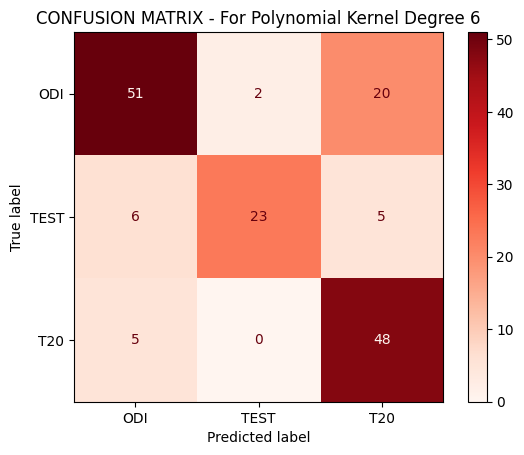

In [13]:
#displaying the confusion matrix
disp_cnf= ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=kohli_data["match_type"].unique())
disp_cnf.plot(cmap= "Reds", values_format= "d")
plt.title("CONFUSION MATRIX - For Polynomial Kernel Degree 6")
plt.show()

Step12: Also print classification report that includes precision, recall, f1 score and accuracy.

In [14]:
class_report = classification_report(y_test, poly_preds)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         ODI       0.82      0.70      0.76        73
         T20       0.92      0.68      0.78        34
        TEST       0.66      0.91      0.76        53

    accuracy                           0.76       160
   macro avg       0.80      0.76      0.77       160
weighted avg       0.79      0.76      0.76       160



Step13: Create a scatter plot for Runs scored on x-axis and strike rate on y-axis. Group each point by match type (by assigning a different colour for each match type on the plot)

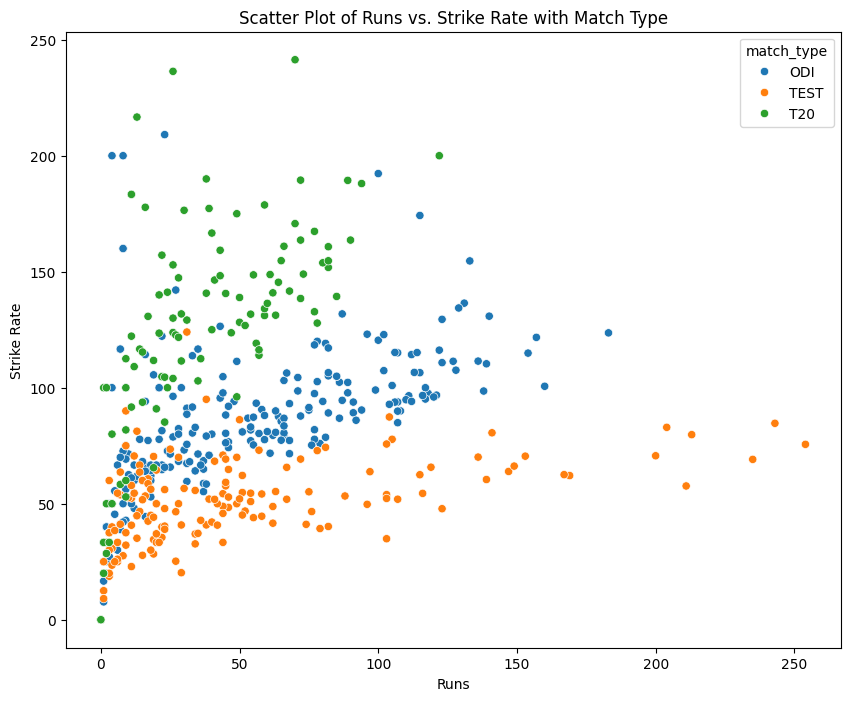

In [15]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Runs', y='SR', hue='match_type', data=kohli_data)
plt.title('Scatter Plot of Runs vs. Strike Rate with Match Type')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.show()